# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [5]:
app_train['DAYS_EMPLOYED'].describe()

count    252137.000000
mean      -2384.169325
std        2338.360162
min      -17912.000000
25%       -3175.000000
50%       -1648.000000
75%        -767.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

In [6]:
app_train['YEARS_EMPLOYED']=abs(app_train['DAYS_EMPLOYED'])/365
app_train['YEARS_EMPLOYED'].describe()

count    252137.000000
mean          6.531971
std           6.406466
min           0.000000
25%           2.101370
50%           4.515068
75%           8.698630
max          49.073973
Name: YEARS_EMPLOYED, dtype: float64

In [7]:
#取出TARGET欄位及year_employed_grep後做離散化 ( 還款與否 v.s. 工作年資)
data_year_employed= app_train[['TARGET','YEARS_EMPLOYED']].dropna()

#將工作年資區分為10等分
year_employed_cut = np.linspace(0, 50, 11)

data_year_employed['year_employed_grp'] = pd.cut(data_year_employed['YEARS_EMPLOYED'], bins=year_employed_cut, include_lowest=True)
print(data_year_employed['year_employed_grp'].value_counts())
data_year_employed.head()

(-0.001, 5.0]    136311
(5.0, 10.0]       64872
(10.0, 15.0]      27549
(15.0, 20.0]      10849
(20.0, 25.0]       6243
(25.0, 30.0]       3308
(30.0, 35.0]       1939
(35.0, 40.0]        832
(40.0, 45.0]        210
(45.0, 50.0]         24
Name: year_employed_grp, dtype: int64


,TARGET,YEARS_EMPLOYED,year_employed_grp
0,1,1.745205,"(-0.001, 5.0]"
1,0,3.254795,"(-0.001, 5.0]"
2,0,0.616438,"(-0.001, 5.0]"
3,0,8.326027,"(5.0, 10.0]"
4,0,8.323288,"(5.0, 10.0]"


In [8]:
# 有能力還債跟無能力還債的用工作年資類分類
grp = ['year_employed_grp','TARGET']
data_year_employed.groupby(grp).count()

YEARS_EMPLOYED
year_employed_grp TARGET                
(-0.001, 5.0]     0             121901.0
                  1              14410.0
(5.0, 10.0]       0              60090.0
                  1               4782.0
(10.0, 15.0]      0              25958.0
                  1               1591.0
(15.0, 20.0]      0              10323.0
                  1                526.0
(20.0, 25.0]      0               5946.0
                  1                297.0
(25.0, 30.0]      0               3176.0
                  1                132.0
(30.0, 35.0]      0               1859.0
                  1                 80.0
(35.0, 40.0]      0                816.0
                  1                 16.0
(40.0, 45.0]      0                209.0
                  1                  1.0
(45.0, 50.0]      0                 24.0
                  1                  NaN

In [9]:
# 求不同工作年資的mean值, TARGET的mean值表示這個組別裡所佔的無還款能力的比例
year_employed_group = data_year_employed.groupby('year_employed_grp').mean()
year_employed_group

,TARGET,YEARS_EMPLOYED
year_employed_grp,,
"(-0.001, 5.0]",0.105714,2.368022
"(5.0, 10.0]",0.073714,7.206095
"(10.0, 15.0]",0.057752,12.238081
"(15.0, 20.0]",0.048484,17.279070
"(20.0, 25.0]",0.047573,22.172262
"(25.0, 30.0]",0.039903,27.291609
"(30.0, 35.0]",0.041258,32.306168
"(35.0, 40.0]",0.019231,37.034615
"(40.0, 45.0]",0.004762,41.987567


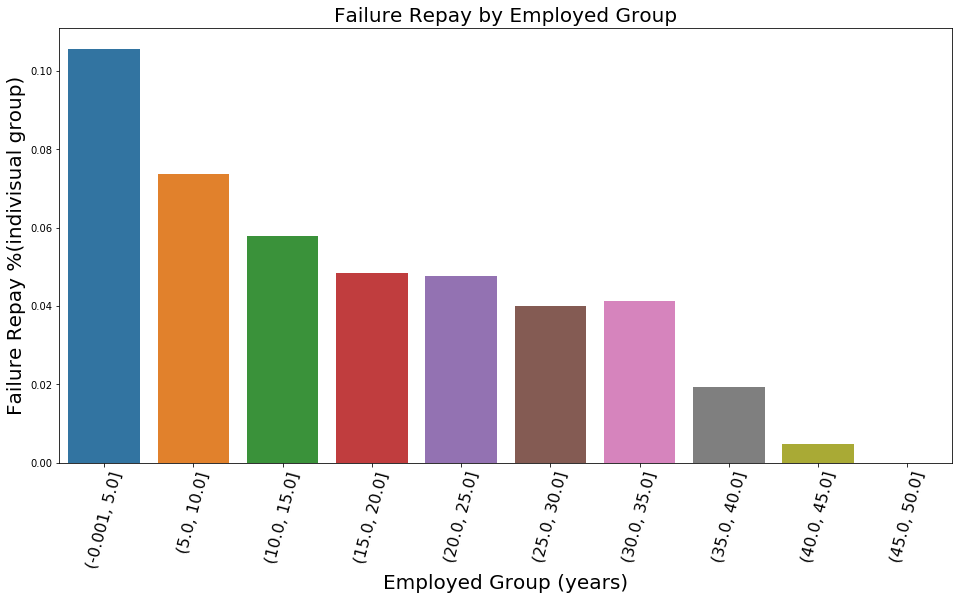

In [10]:
import seaborn as sns 


plt.figure(figsize = (16, 8))
# 以工作年資為 x, TARGET mean為 y 繪製 barplot
px = year_employed_group.index
py = year_employed_group['TARGET']
sns.barplot(px, py)
# Plot labeling
plt.xticks(rotation = 75, fontsize=16)
plt.xlabel('Employed Group (years)', fontsize=20)
plt.ylabel('Failure Repay %(indivisual group)', fontsize=20)
plt.title('Failure Repay by Employed Group', fontsize=20);

plt.show()

## 結論
工作年資越低，發生無法按時還款的比例越高。不過，這組資料工作年資越高，樣本數越少，例如最後一組的樣本數只有24。